In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import ks_2samp
import pickle
import matplotlib.pyplot as plt
from brian2 import *

In [2]:
s = np.genfromtxt('stimulus.csv', delimiter=',')
s_t = np.genfromtxt('stimulus_timing.csv', delimiter=',')

In [3]:
n_trials = 30

# preferred locations of readout layer neurons
N_readout = 400
readout_theta_0 = np.linspace(0,1,N_readout + 1)
readout_theta_0 = readout_theta_0[0:-1] #same as for theta0
rmse_Gaussian = np.zeros([n_trials])

for k in range(0,n_trials):
    #objects = []
    with (open("./data/Gaussian_population/data_readout_layer_{}.pickle".format(k), "rb")) as openfile:
        while True:
            try:
                #objects.append(pickle.load(openfile))
                monitor = pickle.load(openfile)
            except EOFError:
                break
    #monitor = objects[0]
    timing_monitor = monitor["t"]
    spikeID_monitor = monitor["i"]
    t_idx = (1/(0.0001*second))*timing_monitor[:]
    t_idx = t_idx.astype(int)
    errs = s[t_idx] - readout_theta_0[spikeID_monitor[:]]
    errs2 = s[t_idx] - readout_theta_0[spikeID_monitor[:]] + 1
    errs3 = s[t_idx] - readout_theta_0[spikeID_monitor[:]] - 1
    sq_errs = np.minimum(errs**2, errs2**2) #adjust error for circular stimulus (errors within -0.5 - 0.5)
    sq_errs = np.minimum(sq_errs, errs3**2) #adjust error for circular stimulus (errors within -0.5 - 0.5)
    rmse_Gaussian[k] = np.sqrt(np.mean((sq_errs)))

In [4]:
n_trials = 30

# preferred locations of readout layer neurons
N_readout = 400
readout_theta_0 = np.linspace(0,1,N_readout + 1)
readout_theta_0 = readout_theta_0[0:-1] #same as for theta0
rmse_Periodic = np.zeros([n_trials])

for k in range(0,n_trials):
    #objects = []
    with (open("./data/Periodic_population/data_readout_layer_{}.pickle".format(k), "rb")) as openfile:
        while True:
            try:
                #objects.append(pickle.load(openfile))
                monitor = pickle.load(openfile)
            except EOFError:
                break
    #monitor = objects[0]
    timing_monitor = monitor["t"]
    spikeID_monitor = monitor["i"]
    t_idx = (1/(0.0001*second))*timing_monitor[:] #get timing "index" of each spike to find true stimulus in list
    t_idx = t_idx.astype(int)
    #rmse_Periodic[k] = np.sqrt(np.mean((s[t_idx] - readout_theta_0[spikeID_monitor[:]])**2))
    errs = s[t_idx] - readout_theta_0[spikeID_monitor[:]]
    errs2 = s[t_idx] - readout_theta_0[spikeID_monitor[:]] + 1
    errs3 = s[t_idx] - readout_theta_0[spikeID_monitor[:]] - 1
    sq_errs = np.minimum(errs**2, errs2**2) #adjust error for circular stimulus (errors within -0.5 - 0.5)
    sq_errs = np.minimum(sq_errs, errs3**2) #adjust error for circular stimulus (errors within -0.5 - 0.5)
    rmse_Periodic[k] = np.sqrt(np.mean(sq_errs))

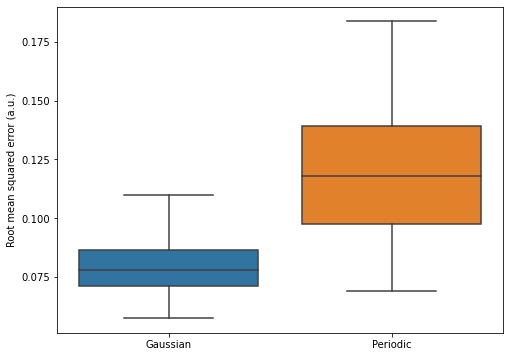

In [5]:
plot_data = np.transpose([rmse_Gaussian, rmse_Periodic])
df = pd.DataFrame(plot_data, columns=["Gaussian", "Periodic"])
# Create a barplot
fig, ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = '26'
#p = sns.catplot(ax = ax, kind="box", data=df, estimator=np.mean)
p = sns.boxplot(ax = ax, data=df)

p.set(ylabel = "Root mean squared error (a.u.)")

fig.savefig('./figures/RMSE_Barplot_time_varying_stim.png')
fig.savefig('./figures/RMSE_Barplot_time_varying_stim.eps', format='eps')

In [6]:
# preform a kolmogorov-smirnov test
ks_2samp(rmse_Gaussian, rmse_Periodic)

KstestResult(statistic=0.7, pvalue=2.5000118318420276e-07)